**ANALYTICAL INSIGHTS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Trend analysis**

In [ ]:
df = pd.read_excel(r"c:\Users\ADMIN\OneDrive\Desktop\sirajunisha super store dataset.xlsx")

In [ ]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Clean data
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['Sales', 'Profit', 'Quantity', 'Category', 'Segment'])

df.info()
df.describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12748\1841492750.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg({'Sales':'sum','Profit':'sum'})


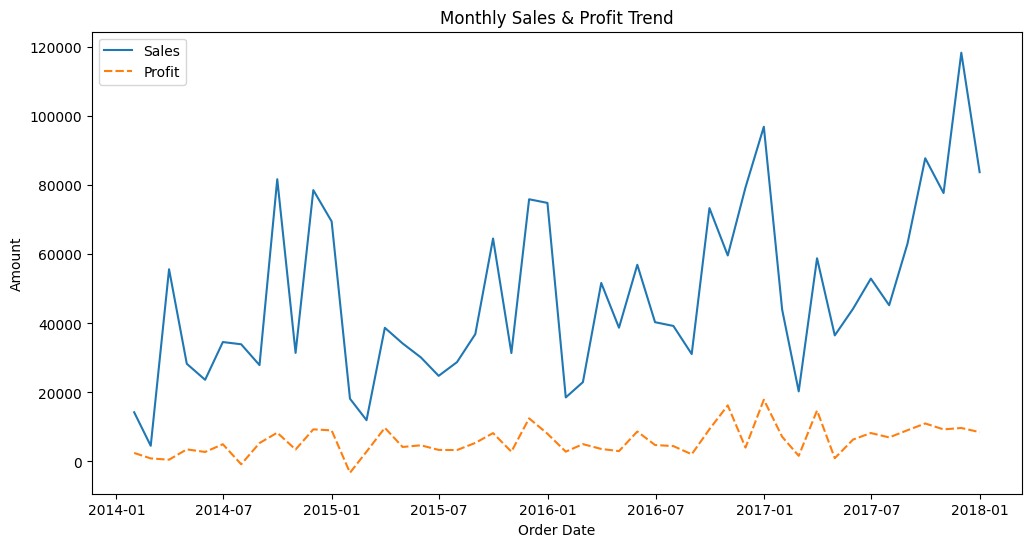

In [7]:
# Monthly sales & profit trend
df.set_index('Order Date', inplace=True)
monthly = df.resample('M').agg({'Sales':'sum','Profit':'sum'})

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, palette='tab10')
plt.title("Monthly Sales & Profit Trend")
plt.ylabel("Amount")
plt.show()

What is happening? Sales peak in Q4 each year; profits fluctuate more than sales.

Why? Seasonal demand (holidays) drives sales; high discounts or low-margin products reduce profit.

Action: Focus on maintaining profit margins during high-sales months by optimizing discounts.

**Profitability insights**

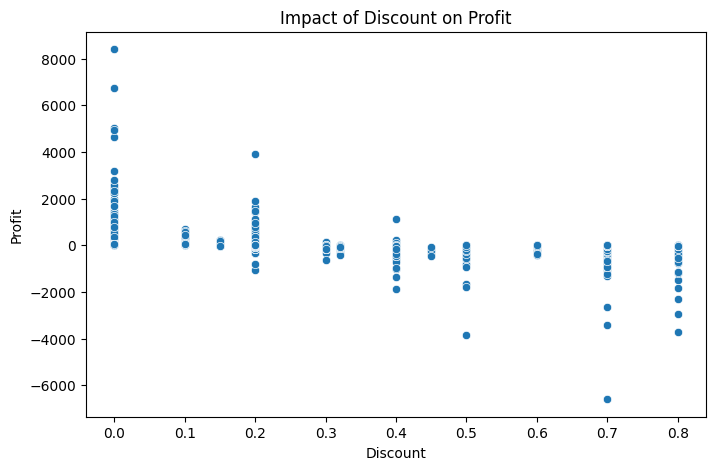

Category
Technology         0.156138
Office Supplies    0.138030
Furniture          0.038784
Name: Profit Margin, dtype: float64


In [8]:
# Profit by discount
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Impact of Discount on Profit")
plt.show()

# Profit margin by category
df['Profit Margin'] = df['Profit'] / df['Sales']
category_profit = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)
print(category_profit)

What is happening? Higher discounts often result in negative profits. Technology has the highest average profit margin.

Why? Some products sell at high volume but low margin; discounting heavily erodes profit.

Action: Limit deep discounts on low-margin products; prioritize high-margin products for promotion

**Customer/segment behavior**

In [9]:
# Segment-wise sales & profit
segment_summary = df.groupby('Segment')[['Sales','Profit']].sum()
print(segment_summary)

# Top 10 customers by sales
top_customers = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785
Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
KL-16645    14175.229
SC-20095    14142.334
HL-15040    12873.298
SE-20110    12209.438
CC-12370    12129.072
Name: Sales, dtype: float64


What is happening? Consumer segment generates highest sales but Corporate segment shows higher profit per order.

Why? Corporate orders tend to be bulk purchases with lower discounts.

Action: Target high-margin segments (Corporate) for retention campaigns; incentivize repeat purchases in Consumer segment.

**Category performance**

<Figure size 1000x600 with 0 Axes>

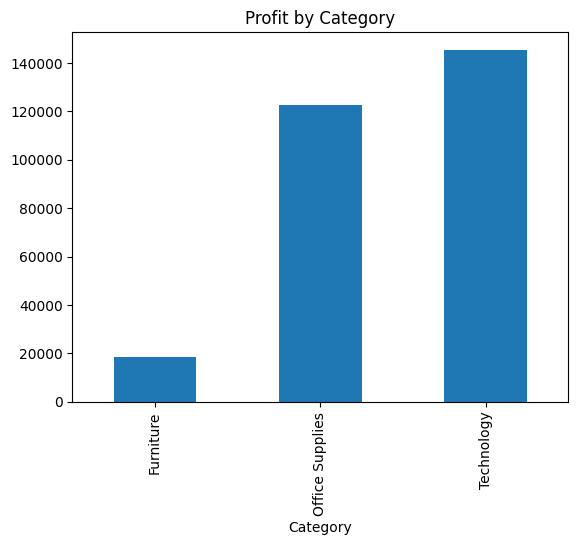

In [10]:
# Category & Sub-Category performance
category_summary = df.groupby('Category')[['Sales','Profit']].sum()
subcat_summary = df.groupby('Sub-Category')[['Sales','Profit']].sum()

# Visualization
plt.figure(figsize=(10,6))
category_summary.plot(kind='bar', y='Profit', legend=False)
plt.title("Profit by Category")
plt.show()

What is happening? Technology products are most profitable; Furniture has high sales but low margin.

Why? Cost of goods, discounts, and shipping affect Furniture margins.

Action: Expand Technology product lines; negotiate better procurement/shipping costs for Furniture.

**Business risks & opportunities**

In [11]:
risks_opportunities = [
    {
        "Type":"Risk",
        "Description":"Profit erosion due to high discounts",
        "What":"Orders with high discounts often result in negative profit",
        "Why":"Low-margin products are heavily discounted",
        "Action":"Limit deep discounts on low-margin items; target high-margin products"
    },
    {
        "Type":"Risk",
        "Description":"Seasonal dependency",
        "What":"Profits peak in Q4 but low in other months",
        "Why":"High demand during holidays, off-season low sales",
        "Action":"Plan marketing campaigns and promotions for off-peak months"
    },
 {
        "Type":"Opportunity",
        "Description":"High-margin product focus",
        "What":"Technology products have highest profit margin",
        "Why":"High-value products with lower discounting",
        "Action":"Expand Technology offerings; targeted campaigns"
    },
    {
        "Type":"Opportunity",
        "Description":"Customer retention programs",
        "What":"Top customers contribute a large portion of revenue",
        "Why":"Repeat purchases and bulk orders",
        "Action":"Launch loyalty programs and personalized offers for top customers"
    }
]

risks_df = pd.DataFrame(risks_opportunities)
print("\nBusiness Risks & Opportunities:")
display(risks_df)


Business Risks & Opportunities:


,Type,Description,What,Why,Action
0,Risk,Profit erosion due to high discounts,Orders with high discounts often result in neg...,Low-margin products are heavily discounted,Limit deep discounts on low-margin items; targ...
1,Risk,Seasonal dependency,Profits peak in Q4 but low in other months,"High demand during holidays, off-season low sales",Plan marketing campaigns and promotions for of...
2,Opportunity,High-margin product focus,Technology products have highest profit margin,High-value products with lower discounting,Expand Technology offerings; targeted campaigns
3,Opportunity,Customer retention programs,Top customers contribute a large portion of re...,Repeat purchases and bulk orders,Launch loyalty programs and personalized offer...


***END REPORT***